<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.2.1

# Data

> The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

> One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this lab, we'll explore this dataset to find insight.

[Titanic Dataset](https://www.kaggle.com/c/titanic/data)

# Data Dictionary

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

# Loading Modules

In [22]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

%matplotlib inline

# Loading Dataset

Read titanic dataset.

In [3]:
# Read Titanic Dataset
titanic_csv = r'~\Documents\IOD-testing\DATA\titanic_train.csv'
titanic = pd.read_csv(titanic_csv)

# Explore Dataset

## Head

In [ ]:
# Check Head
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Tail

In [ ]:
# Check Tail
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Shape

Find shape of dataset.

In [ ]:
# ANSWER
titanic.shape

(891, 12)

## Check Types of Data

Check types of data you have

In [ ]:
# ANSWER
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Check Null Values

Check whether dataset have any null values.

In [ ]:
# ANSWER
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Check titanic data again
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Fill Null Values

Is there any null values in any columns? 

- Identify those columns
- Fill those null values using your own logic
    - State your logic behind every steps

### Age

In [ ]:
# ANSWER
titanic['Age'].fillna(titanic.groupby(['Sex']['Age']).transform('median'),inplace=True)

In [22]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Cabin

In [12]:
# ANSWER
titanic['cabin_new']=titanic['Cabin'].apply(lambda x: x[:1] if type(x) is str else x)

In [26]:
titanic['cabin_new']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: cabin_new, Length: 891, dtype: object

<AxesSubplot:xlabel='Pclass'>

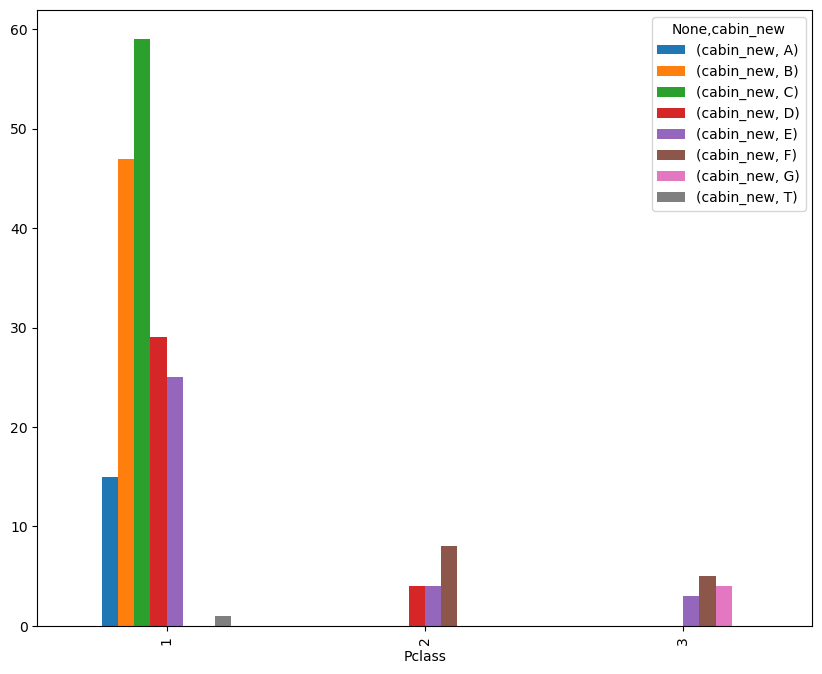

In [35]:
titanic.groupby(by=['Pclass','cabin_new']).agg({'cabin_new':'count'}).unstack().plot(kind='bar',figsize=(10,8))

In [45]:
cabin_map={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7}
titanic['cabin_map']=titanic['cabin_new'].map(cabin_map)
titanic.groupby(['Pclass'])['cabin_map'].mean()

Pclass
1    3.011429
2    5.250000
3    6.083333
Name: cabin_map, dtype: float64

In [39]:
titanic['cabin_map']=np.round(titanic.cabin_map,decimals=0)
titanic['cabin_map'].fillna(titanic.groupby('Pclass')['cabin_map'].transform('median'),inplace=True)

In [59]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_new,cabin_map
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,F,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,F,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,F,NaN


In [61]:
titanic['cabin_new'].fillna(titanic['Pclass'].transform(lambda x: 'C' if x==1 else 'E' if x==5 else 'F'),inplace=True)


In [60]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_new,cabin_map
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,F,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,F,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,F,NaN


### Embarked

In [65]:
# ANSWER
titanic.loc[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_new,cabin_map
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,B,2.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,B,2.0


In [72]:
titanic['Embarked'].fillna('S',inplace=True)

In [79]:
titanic.iloc[[61,829],:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_new,cabin_map
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S,B,2.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S,B,2.0


# Describe

Describe your dataset.

In [80]:
# ANSWER
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,cabin_map
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,203.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,3.369458
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.444160
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,2.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,3.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,4.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,7.000000


# Relationship between Features and Survival

Find relationship between categorical features and survived.

**Describe your findings.**

In [82]:
def bar_charts(df, feature):
    '''
    Inputs:
    df: Dataset
    feature: Name of Feature to Check With Survived
    '''
    _agg = {
        'PassengerId': 'count'
    }
    _groupby = ['Survived', feature]

    df_feature = df.groupby(by=_groupby).agg(_agg)
    
    ax = df_feature.unstack().plot(kind='bar', figsize=(15,6))
    plt.legend(list(df_feature.index.levels[1].unique()))
    plt.xlabel('Survived')
    plt.xticks(np.arange(2), ('No', 'Yes'))
    plt.show();

## Pclass

Use barchart to find relationship between survived and pclass.  Note your findings.

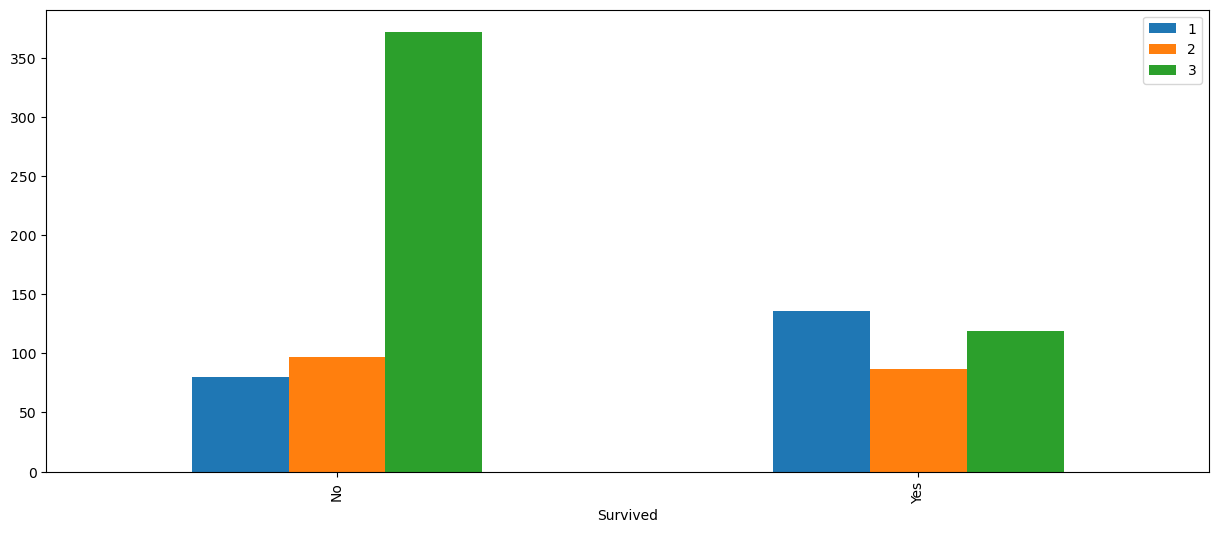

In [83]:
# ANSWER
bar_charts(titanic, 'Pclass')

## Sex

Use barchart to find relationship between survived and sex.  Note your findings.

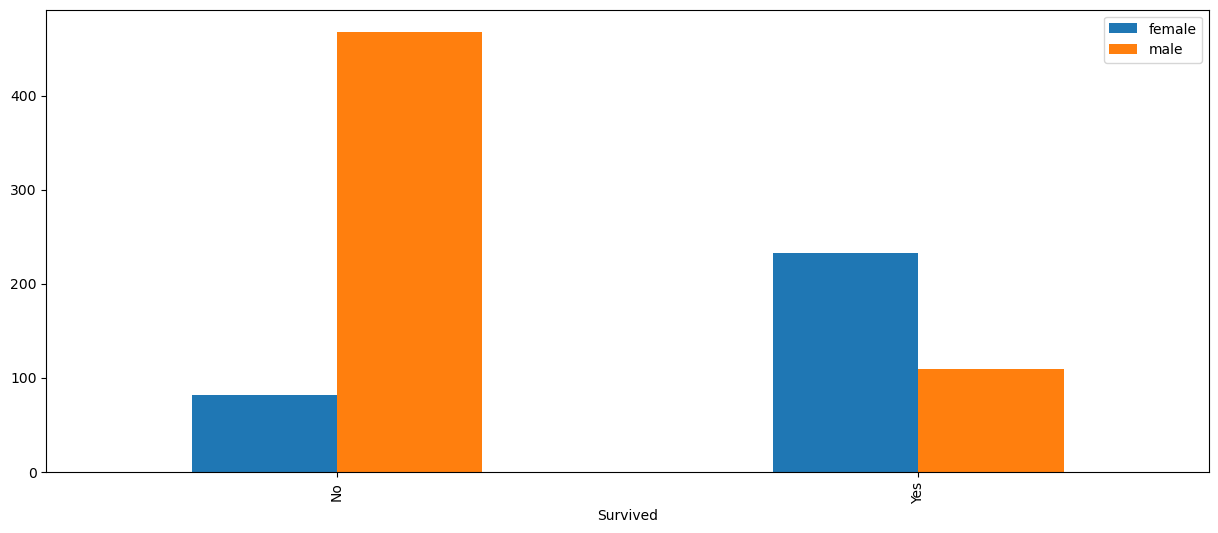

In [84]:
# ANSWER
bar_charts(titanic, 'Sex')

## Parch

Parch = Number of parents of children travelling with each passenger.

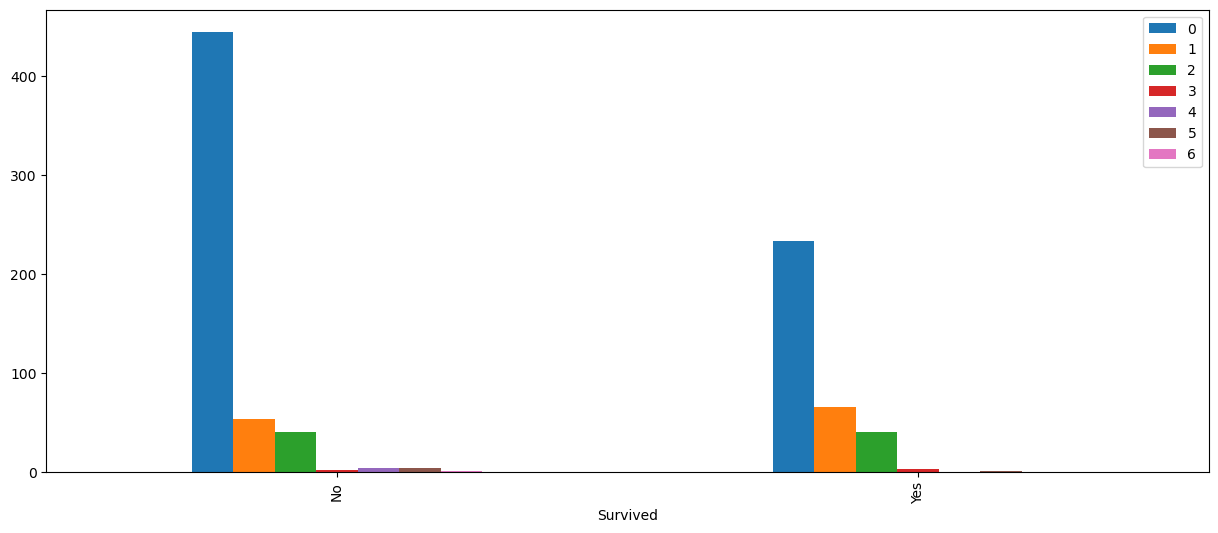

In [85]:
# ANSWER
bar_charts(titanic, 'Parch')

## SibSp

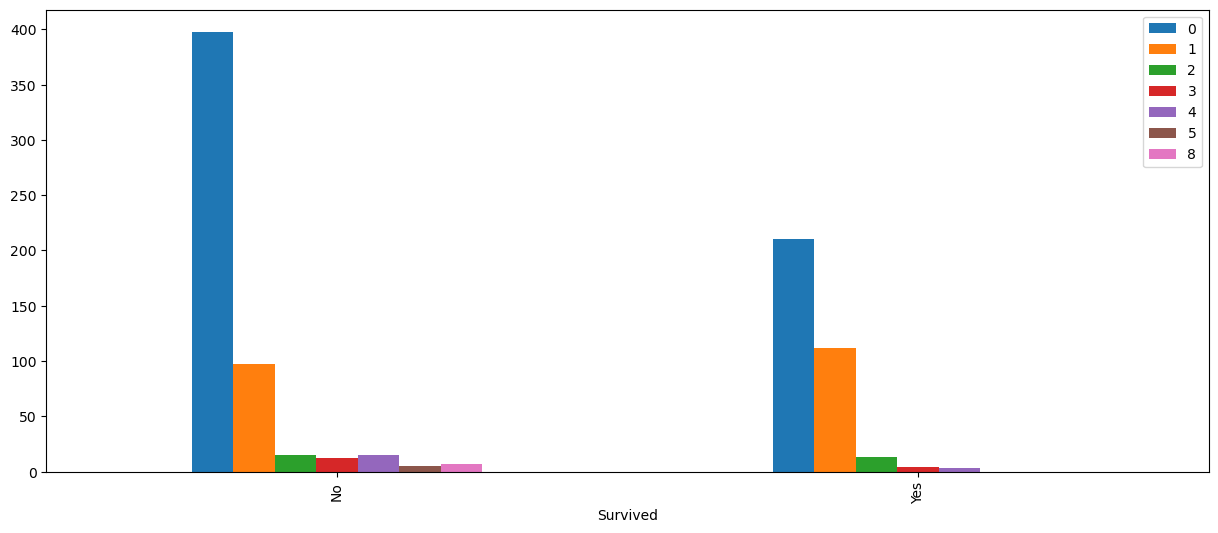

In [86]:
bar_charts(titanic, 'SibSp')

## Embarked

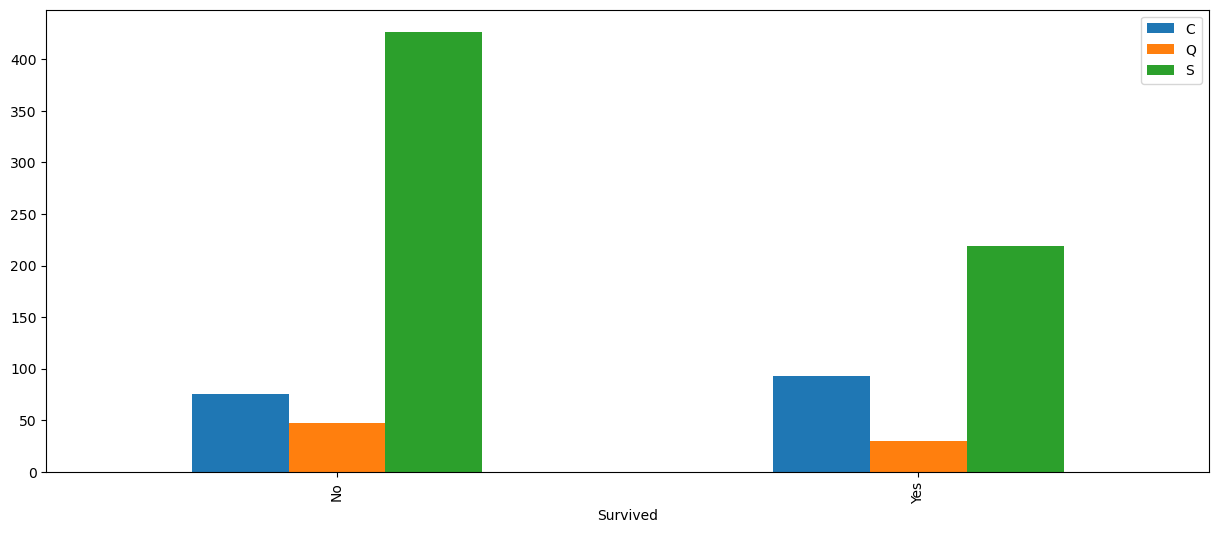

In [87]:
bar_charts(titanic, 'Embarked')

# Feature Engineering

Create some new features from existing feature.

## Fare Class

Create a new class based on their fare. Is there any relationship between fare and survival? 

In [90]:
def create_fare_class(x):
    if x > 30:
        fare_class = 1
    elif x > 20 and x <= 30:
        fare_class = 2
    elif x > 10 and x <= 20:
        fare_class = 3
    else:
        fare_class = 4
    return fare_class

In [91]:
fare_class_list = []
#titanic['Fare_class'] = 0
for i in range(len(titanic)):
    k = create_fare_class(titanic['Fare'][i])
    fare_class_list.append(k)
    #titanic['Fare_class'].loc[i] = k

titanic['Fare_class'] = fare_class_list

In [92]:
titanic['Fare_class'] = titanic['Fare'].apply(create_fare_class)

## Age Class

In [ ]:
# ANSWER

In [93]:
def create_age_class(x):
    if x > 60:
        age_class = 5
    elif x > 35 and x <= 60:
        age_class = 4
    elif x > 25 and x <= 35:
        age_class = 3
    elif x > 16 and x <= 25:
        age_class = 2
    else:
        age_class = 1
    return age_class

In [95]:
# ANSWER
titanic['age_class'] = titanic['Age'].apply(create_age_class)

# Statistical Overview

## Correlation

Find correlation between `survived` and other features.

In [96]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,cabin_map,Fare_class,age_class
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.083671,0.003258,0.035025
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.041841,-0.307600,0.005863
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.619288,0.719670,-0.352017
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.192717,-0.122591,0.937647
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.047626,-0.380692,-0.201286
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.033374,-0.387100,-0.054464
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.297521,-0.599129,0.128121
cabin_map,-0.083671,0.041841,0.619288,-0.192717,0.047626,0.033374,-0.297521,1.000000,0.411007,-0.102526
Fare_class,0.003258,-0.307600,0.719670,-0.122591,-0.380692,-0.387100,-0.599129,0.411007,1.000000,-0.172863
age_class,0.035025,0.005863,-0.352017,0.937647,-0.201286,-0.054464,0.128121,-0.102526,-0.172863,1.000000


In [104]:
sys_bp=[183, 152, 178, 157, 194, 163, 144, 114, 178, 152, 118, 158, 172, 138]

mu=165

In [105]:
from scipy import stats

t_statistic,p_value=stats.ttest_1samp(sys_bp,mu)

In [106]:
p_value

0.23575481011813063

In [107]:
one_tailed_p_value=float("{:.6f}".format(p_value/2)) # Since alternative hypothesis is one tailed, We need to divide the p value by 2.

print('Test statistic is %f'%float("{:.6f}".format(t_statistic)))
print('p-value for one tailed test is %f'%one_tailed_p_value)

Test statistic is -1.243183
p-value for one tailed test is 0.117877


In [108]:
sys_bp=[183, 152, 178, 157, 194, 163, 144, 114, 178, 152, 118, 158, 172, 138]

mu=165


from scipy import stats

t_value,p_value=stats.ttest_1samp(sys_bp,mu)

one_tailed_p_value=float("{:.6f}".format(p_value/2)) # Since alternative hypothesis is one tailed, We need to divide the p value by 2.

print('Test statistic is %f'%float("{:.6f}".format(t_value)))
print('p-value for one tailed test is %f'%one_tailed_p_value)

alpha = 0.05
if one_tailed_p_value<=alpha:

    print('Conclusion','n','Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. 
    So we conclude that there is a significant mean difference in systolic blood pressure. 
    i.e., μ = 165 at %.2f level of significance'''%alpha)

else:

    print('Conclusion','n','Since p-value(=%f)'%one_tailed_p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0.''')

Test statistic is -1.243183
p-value for one tailed test is 0.117877
Conclusion n Since p-value(=0.117877) > alpha(=0.05) We do not reject the null hypothesis H0.


In [ ]:
#statistically significant means the null hypothesis got rejected.

# [BONUS] Hypothesis Testing
---
The usual process of null hypothesis testing consists of four steps.

1. Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

2. Identify a test statistic that can be used to assess the truth of the null hypothesis.

3. Compute the p-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the p-value, the stronger the evidence against the null hypothesis.

4. Compare the p-value to an acceptable significance value alpha (sometimes called an alpha value). If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

### Define Hypothesis

> Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

    Null Hypothesis (H0): There is no difference in the survival rate between the young and old passengers.

    Alternative Hypothesis (HA): There is a difference in the survival rate between the young and old passengers.

### Collect Data

Next step is to collect data for each population group. 

Collect two sets of data, one with the passenger greater than 35 years of age and another one with the passenger younger than 35. The sample size should ideally be the same but it can be different. Lets say that the sample sizes is 100.

In [15]:
# ANSWER
titanic_old=titanic[titanic.Age>35].sample(100)
titanic_young=titanic[titanic.Age<=35].sample(100)

### Set alpha (let alpha = 0.05)

> Identify a test statistic that can be used to assess the truth of the null hypothesis.

In [27]:
# ANSWER
alpha=0.05

### Calculate point estimate

In [16]:
a = titanic_young['Survived']
b = titanic_old['Survived']

In [18]:
## Calculate the variance to get the standard deviation
var_a = a.var(ddof = 1)
var_b = b.var(ddof = 1)

## Calculate the Standard Deviation
s = np.sqrt((var_a + var_b)/2)

### Calculate test statistic

In [20]:
## Calculate the t-statistic
N=100
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))

### Find the p-value

> Compute the P-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the P-value, the stronger the evidence against the null hypothesis.

In [23]:
## Compare with the critical t-value
## Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
if (t > 0):
    p = 1 - stats.t.cdf(t, df = df) 
else:
    p = stats.t.cdf(t, df = df)

In [24]:
print("t = " + str(t))
print("p = " + str(2*p))

t = 0.42716483137068184
p = 0.6697234234356153


### Interpret results

> Compare the p-value to an acceptable significance value  alpha (sometimes called an alpha value). If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

In [25]:
def print_sig(p_value, alpha):
    if p_value < alpha:
        print("We reject our null hypothesis.")
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
    else:
        print("Our test is inconclusive.")

In [28]:
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

print_sig(p2, alpha)

t = 0.42716483137068173
p = 0.6697234234356153
We fail to reject our null hypothesis.




---



---



> > > > > > > > > © 2022 Institute of Data


---



---



